<a href="https://colab.research.google.com/github/anupampani123/Basic-Classification-/blob/main/Reuters_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#classifying news headlines into topics

from tensorflow import keras
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data( num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [3]:
word_index = reuters.get_word_index() 
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) 
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

550378/550378 [==============================] - 0s 0us/step


In [4]:
#vectorizing the input
num_words= 10000;
import numpy as np
def vectorize_sequences(sequences,dimension=10000):
  results=np.zeros((len(sequences),dimension))
  for bloop, sequence in enumerate(sequences):
    results[bloop,sequence]=1;
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
#vectorizing the labels since there are 46 labels 
#one hot encoding

def to_one_hot(sequences, dimension=46):
  results=np.zeros((len(sequences),dimension))
  for bloop,sequence in enumerate(sequences):
    results[bloop,sequence]=1;
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [20]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,))) 
model.add(layers.Dense(64, activation='relu')) 
model.add(layers.Dense(64, activation='relu')) 
model.add(layers.Dense(46, activation='softmax'))




In [21]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='categorical_crossentropy',
                      metrics=['accuracy'])

In [22]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [23]:

history = model.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 37ms/step - loss: 2.6319 - accuracy: 0.4758 - val_loss: 1.7405 - val_accuracy: 0.6020
Epoch 2/20
16/16 [==============================] - 0s 30ms/step - loss: 1.4545 - accuracy: 0.6804 - val_loss: 1.3358 - val_accuracy: 0.7000
Epoch 3/20
16/16 [==============================] - 1s 66ms/step - loss: 1.1027 - accuracy: 0.7533 - val_loss: 1.2171 - val_accuracy: 0.7240
Epoch 4/20
16/16 [==============================] - 1s 29ms/step - loss: 0.8754 - accuracy: 0.8039 - val_loss: 1.0761 - val_accuracy: 0.7780
Epoch 5/20
16/16 [==============================] - 0s 28ms/step - loss: 0.6986 - accuracy: 0.8450 - val_loss: 1.0352 - val_accuracy: 0.7750
Epoch 6/20
16/16 [==============================] - 0s 29ms/step - loss: 0.5418 - accuracy: 0.8817 - val_loss: 1.0228 - val_accuracy: 0.7880
Epoch 7/20
16/16 [==============================] - 0s 28ms/step - loss: 0.4320 - accuracy: 0.9069 - val_loss: 0.9394 - val_accuracy: 0.8090
Epoch 8/20
16

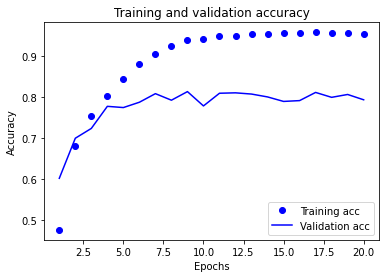

In [24]:
import matplotlib.pyplot as plt

loss = history.history['loss'] 
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs')
plt.ylabel('Accuracy') 
plt.legend()